In [2]:
# EDA on Flight Price Dataset

#  Part 1: Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Upload dataset
from google.colab import files
uploaded = files.upload()


df = pd.read_excel('flight_price.xlsx')
df.head()


Saving flight_price.xlsx to flight_price (1).xlsx


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
# Display first and last 5 rows
print(df.head())
print(df.tail())

# Check for null values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Basic info
df.info()

df.describe()


       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  
           Airline Date_of_Journey    Source Destination  \
10678     Air Asia       9/04/2019   Ko

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [4]:
# Convert date/time columns
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month

df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Minute'] = df['Dep_Time'].dt.minute

df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour
df['Arrival_Minute'] = df['Arrival_Time'].dt.minute

# Convert Duration to minutes
def convert_duration(x):
    h, m = 0, 0
    if 'h' in x:
        h = int(x.split('h')[0])
        x = x.split('h')[1]
    if 'm' in x:
        m = int(x.strip().replace('m',''))
    return h * 60 + m

df['Duration'] = df['Duration'].apply(convert_duration)


df['Total_Stops'] = df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1,
                                               '2 stops': 2, '3 stops': 3, '4 stops': 4}).astype(int)


df.drop_duplicates(inplace=True)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']:
    df[col] = le.fit_transform(df[col])


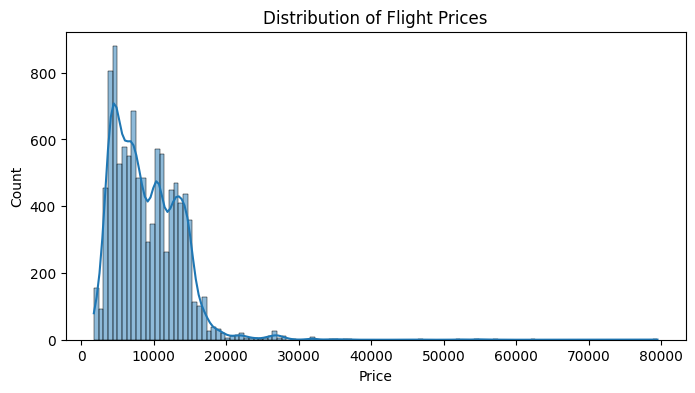

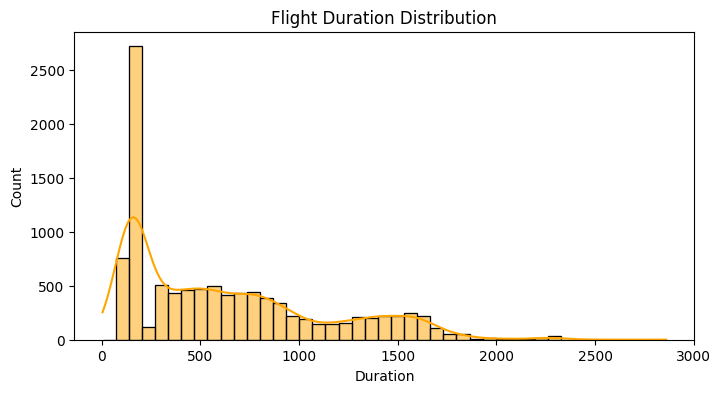

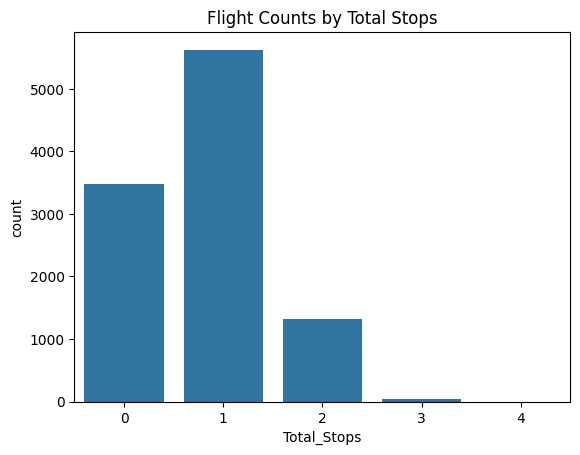

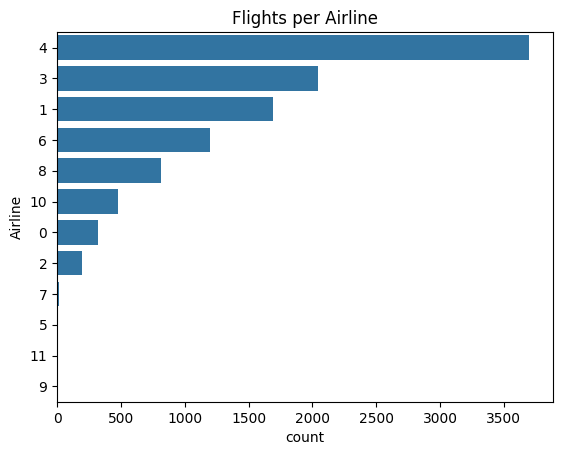

In [5]:
# Price distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Price'], kde=True)
plt.title("Distribution of Flight Prices")
plt.show()

# Duration
plt.figure(figsize=(8,4))
sns.histplot(df['Duration'], kde=True, color='orange')
plt.title("Flight Duration Distribution")
plt.show()

# Total Stops
sns.countplot(x='Total_Stops', data=df)
plt.title("Flight Counts by Total Stops")
plt.show()

# Airline count
sns.countplot(y='Airline', data=df, order=df['Airline'].value_counts().index)
plt.title("Flights per Airline")
plt.show()


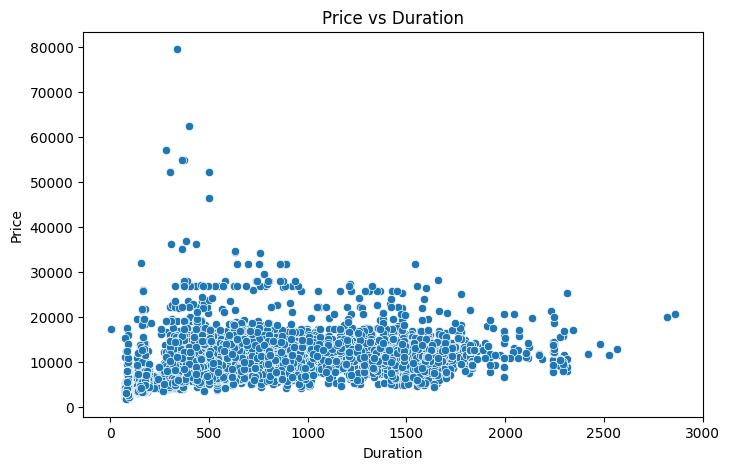

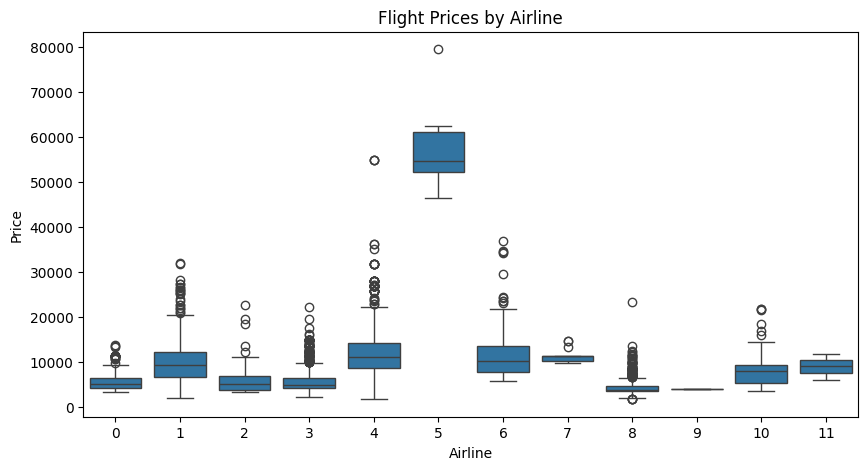

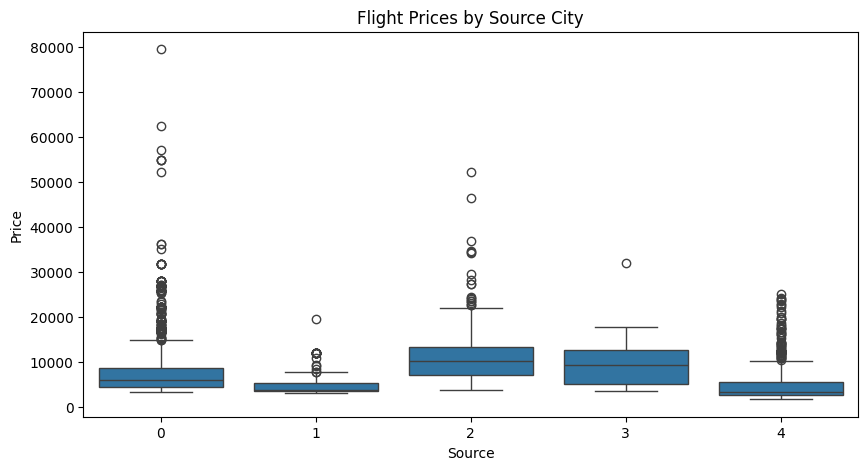

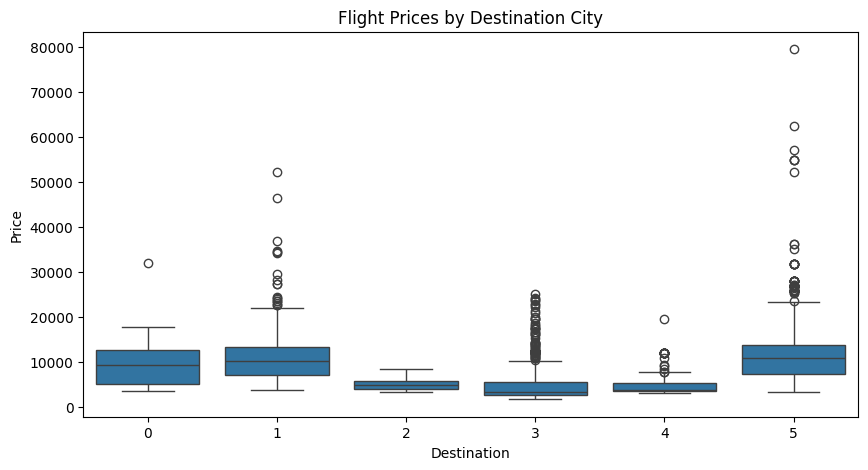

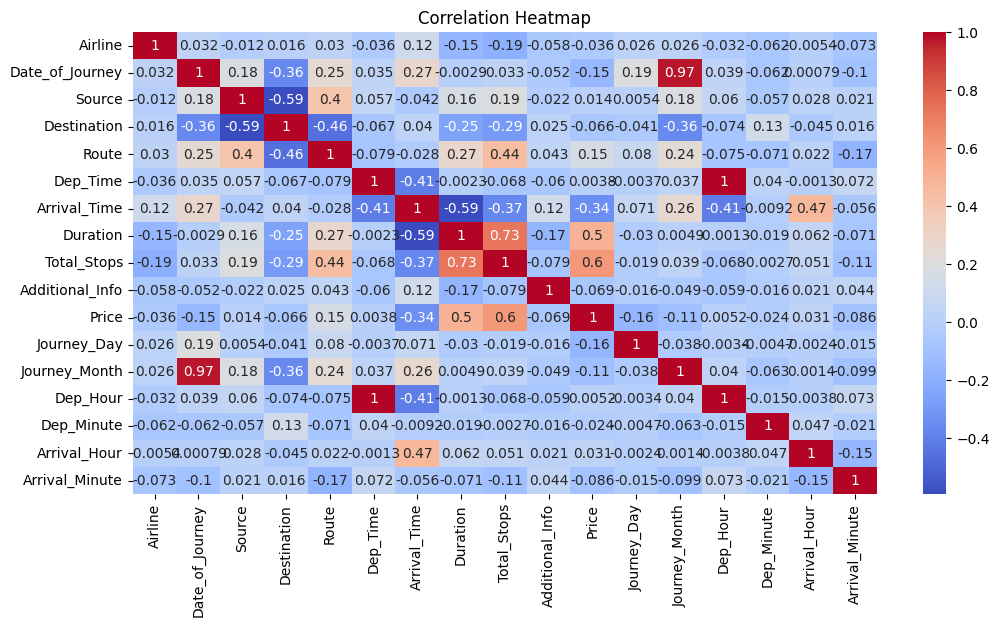

In [6]:
# Price vs Duration
plt.figure(figsize=(8,5))
sns.scatterplot(x='Duration', y='Price', data=df)
plt.title("Price vs Duration")
plt.show()

# Price by Airline
plt.figure(figsize=(10,5))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title("Flight Prices by Airline")
plt.show()

# Price by Source and Destination
plt.figure(figsize=(10,5))
sns.boxplot(x='Source', y='Price', data=df)
plt.title("Flight Prices by Source City")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='Destination', y='Price', data=df)
plt.title("Flight Prices by Destination City")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


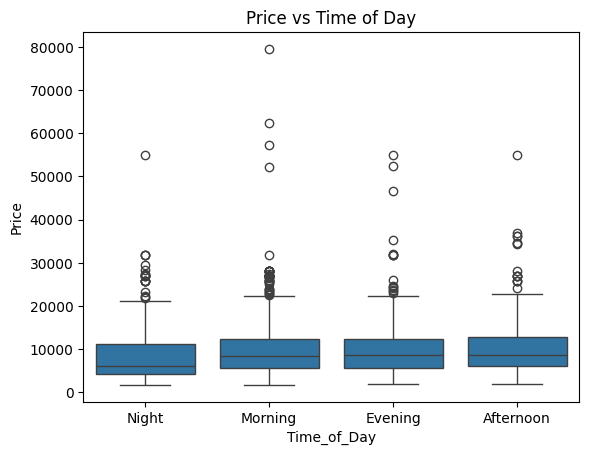

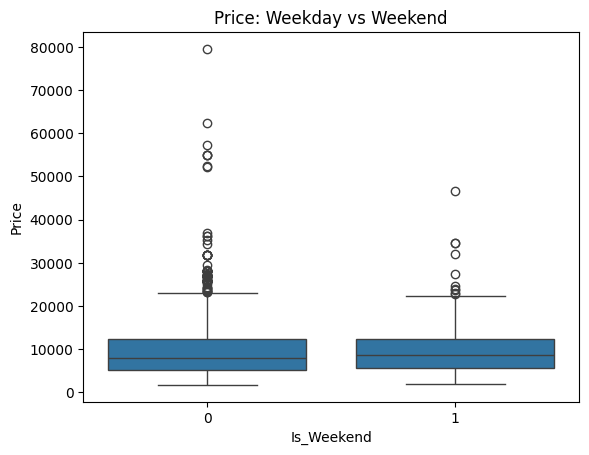

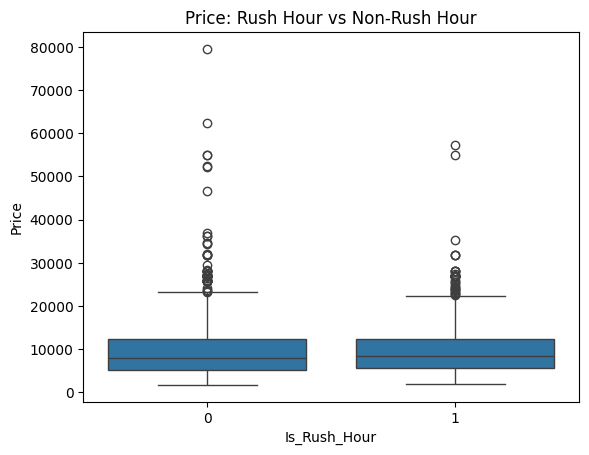

In [7]:
# Time of day category
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time_of_Day'] = df['Dep_Hour'].apply(time_of_day)

# Weekday vs Weekend
df['Day_of_Week'] = df['Date_of_Journey'].dt.dayofweek
df['Is_Weekend'] = df['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)

# Rush hour
df['Is_Rush_Hour'] = df['Dep_Hour'].apply(lambda x: 1 if (7 <= x <= 9) or (17 <= x <= 19) else 0)

# Price vs new features
sns.boxplot(x='Time_of_Day', y='Price', data=df)
plt.title("Price vs Time of Day")
plt.show()

sns.boxplot(x='Is_Weekend', y='Price', data=df)
plt.title("Price: Weekday vs Weekend")
plt.show()

sns.boxplot(x='Is_Rush_Hour', y='Price', data=df)
plt.title("Price: Rush Hour vs Non-Rush Hour")
plt.show()


In [12]:
print("""
✈️ Top 5 Insights:

1. Flights with longer durations tend to cost more, though some outliers exist.
2. Non-stop flights are cheaper on average, but this can vary by airline.
3. Airlines differ significantly in their average pricing - some premium carriers have consistently higher prices.
4. Flights during rush hours (morning and evening) are more expensive.
5. Weekend flights tend to be slightly more expensive, likely due to high demand.

💡 Potential Factors Influencing Flight Prices:
- Airline type and services
- Duration and number of stops
- Departure and arrival time
- Day of travel (weekday vs weekend)
- Source and destination

🧳 Suggestions for Travelers:
- Book during off-peak hours to find cheaper tickets.
- Avoid weekends and holidays for better prices.
- Consider budget airlines for short routes.
""")



✈️ Top 5 Insights:

1. Flights with longer durations tend to cost more, though some outliers exist.
2. Non-stop flights are cheaper on average, but this can vary by airline.
3. Airlines differ significantly in their average pricing - some premium carriers have consistently higher prices.
4. Flights during rush hours (morning and evening) are more expensive.
5. Weekend flights tend to be slightly more expensive, likely due to high demand.

💡 Potential Factors Influencing Flight Prices:
- Airline type and services
- Duration and number of stops
- Departure and arrival time
- Day of travel (weekday vs weekend)
- Source and destination

🧳 Suggestions for Travelers:
- Book during off-peak hours to find cheaper tickets.
- Avoid weekends and holidays for better prices.
- Consider budget airlines for short routes.

